# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Atifa Fiorenza
- **Email:** atifafiorenza24@gmail.com
- **ID Dicoding:** atifafiorenza24

# **1. Menentukan Pertanyaan Bisnis**

- Jam berapa terjadi lonjakan penyewaan sepeda per hari?
- Siapa yang lebih aktif: pengguna kasual atau pengguna terdaftar?
- Bagaimana perbedaan rata-rata jumlah peminjaman sepeda antara hari kerja, akhir pekan, dan hari libur? Kategori hari mana yang memiliki rata-rata peminjaman tertinggi dan terendah?
- Seberapa banyak hujan ringan benar-benar menurunkan jumlah peminjam sepeda pada jam sibuk?
- Musim apa yang paling tinggi penyewaan sepedanya?
- Apakah musim panas selalu punya peminjaman tertinggi tiap tahun?


# **2. Import Semua Packages/Library yang Digunakan**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Data Wrangling**

### 3.1 Gathering Data

In [2]:
url_day = "https://raw.githubusercontent.com/atifa1110/Dashboard-Bicycle/main/data/day.csv"
bike_day_df = pd.read_csv(url_day)
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
url_hour = "https://raw.githubusercontent.com/atifa1110/Dashboard-Bicycle/refs/heads/main/data/hour.csv"
bike_hour_df = pd.read_csv(url_hour)
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 3.2 Assessing Data

Dataset Information

In [4]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dataset ini terdiri dari 731 baris data yang merepresentasikan aktivitas penyewaan sepeda harian selama dua tahun, yaitu tahun 2011 dan 2012. Terdapat 16 kolom yang mencakup informasi mengenai waktu, kondisi cuaca, status hari (libur atau hari kerja), serta jumlah pengguna sepeda baik yang terdaftar maupun tidak.

Seluruh kolom pada dataset memiliki jumlah data yang lengkap (non-null), yang berarti tidak terdapat nilai kosong atau hilang. Ini menunjukkan bahwa dataset sudah bersih dan siap digunakan untuk analisis lebih lanjut tanpa perlu proses imputasi data yang hilang.

In [5]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dataset ini terdiri dari 17.379 baris data yang merepresentasikan penyewaan sepeda pada tingkat jam selama periode dua tahun (2011 dan 2012). Setiap baris mencerminkan data untuk satu jam tertentu.

Terdapat 17 kolom dalam dataset ini, yang mencakup berbagai informasi, Seluruh kolom memiliki jumlah data yang lengkap (non-null), yang berarti tidak ada nilai kosong. Ini menunjukkan bahwa dataset bersih dan siap dianalisis lebih lanjut tanpa perlu penanganan data hilang.

Dibandingkan dataset harian (day.csv), data ini memberikan detail yang lebih granular, yang memungkinkan analisis pola penyewaan sepeda berdasarkan waktu dalam sehari (seperti jam sibuk), serta dampak cuaca atau status hari terhadap perilaku pengguna.

Check Mission Value

In [6]:
bike_day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
bike_hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Tidak Terdapat Missing Value pada kedua dataframe yang ada

Check duplicated data

In [8]:
print("Jumlah duplikasi data pada dataframe bike_day_df : ", bike_day_df.duplicated().sum())
print("Jumlah duplikasi data pada dataframe bike_hour_df : ", bike_hour_df.duplicated().sum())

Jumlah duplikasi data pada dataframe bike_day_df :  0
Jumlah duplikasi data pada dataframe bike_hour_df :  0


Tidak Terdapat duplicated pada kedua dataframe yang ada

Statistical Description of the Dataset

In [9]:
bike_day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Dataset terdiri dari 731 hari data peminjaman sepeda. Suhu dan kelembaban bervariasi, tetapi sebagian besar hari memiliki suhu sedang (0.5) dan kelembaban sedang (0.6). Sebagian besar pengguna adalah pengguna terdaftar, dengan rata-rata total peminjaman harian sekitar 4.500 sepeda. Jumlah peminjaman harian berkisar dari 22 hingga 8714, menunjukkan variasi tinggi, kemungkinan dipengaruhi oleh musim, cuaca, dan hari kerja/libur.

In [10]:
bike_hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### 3.3 Cleaning Data

Cleaning and Labelling

- Kita akan menghapus kolom instant karena hanya merupakan ID urutan dan tidak memiliki kontribusi berarti dalam analisis data.

- Kita akan mempertahankan kolom dteday karena dibutuhkan untuk melihat pola waktu seperti hari dan tanggal penyewaan.

- Kita akan mempertahankan kolom hr karena digunakan untuk menganalisis jam berapa terjadi lonjakan penyewaan sepeda.

- Kolom season, yr, dan weathersit sudah mengalami label encoding, jadi akan tetap digunakan namun perlu diingat arti tiap nilainya saat visualisasi atau analisis.

- Kolom holiday dan workingday adalah kolom dengan nilai boolean (0 atau 1) yang akan tetap digunakan untuk membandingkan hari libur, akhir pekan, dan hari kerja.

- Kita akan mempertahankan kolom temp, atemp, hum, dan windspeed karena berguna untuk melihat pengaruh kondisi cuaca terhadap penyewaan sepeda. Perlu diingat bahwa kolom-kolom ini telah dinormalisasi, jadi bukan dalam satuan asli.

- Kolom casual dan registered akan dipertahankan karena kita ingin membandingkan perilaku pengguna kasual dan pengguna terdaftar.

- Kolom cnt sebagai total jumlah peminjaman akan menjadi variabel utama untuk analisis.

- Kita juga bisa membuat label tambahan (mapping) agar nilai season, weathersit, dan yr lebih mudah dibaca saat visualisasi (misalnya: 0 → "2011", 1 → "2012").



 Untuk bike_day_df (data harian):

In [11]:
# 1. Menghapus kolom yang tidak diperlukan

In [12]:
# 2. Ubah kolom 'dteday' ke format datetime
bike_day_df['dteday'] = pd.to_datetime(bike_day_df['dteday'])

In [13]:
# 3. Mapping label kategori
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_map = {
    1: 'Clear or Partly Cloudy',
    2: 'Mist + Cloudy',
    3: 'Light Snow or Rain',
    4: 'Heavy Rain/Snow'
}
year_map = {0: '2011', 1: '2012'}

In [14]:
# 4. Tambahkan kolom label
bike_day_df['season_label'] = bike_day_df['season'].map(season_map)
bike_day_df['weather_label'] = bike_day_df['weathersit'].map(weather_map)
bike_day_df['year_label'] = bike_day_df['yr'].map(year_map)

In [15]:
# 5. Tambahkan kolom kategori hari (Hari Libur, Akhir Pekan, Hari Kerja)
def categorize_day(row):
    if row['holiday'] == 1:
        return 'Hari Libur'
    elif row['weekday'] in [0, 6]:  # Minggu (0) atau Sabtu (6)
        return 'Akhir Pekan'
    else:
        return 'Hari Kerja'

bike_day_df['day_category'] = bike_day_df.apply(categorize_day, axis=1)

In [16]:
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label,weather_label,year_label,day_category
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Spring,Mist + Cloudy,2011,Akhir Pekan
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Spring,Mist + Cloudy,2011,Akhir Pekan
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Spring,Clear or Partly Cloudy,2011,Hari Kerja
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Spring,Clear or Partly Cloudy,2011,Hari Kerja
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Spring,Clear or Partly Cloudy,2011,Hari Kerja


✅ Untuk bike_hour_df (data per jam):

In [19]:
# 1. Menghapus kolom yang tidak diperlukan

In [17]:
# 2. Ubah kolom 'dteday' ke format datetime
bike_hour_df['dteday'] = pd.to_datetime(bike_hour_df['dteday'])

In [20]:
# 3. Mapping label kategori (sama seperti yang atas)
bike_hour_df['season_label'] = bike_hour_df['season'].map(season_map)
bike_hour_df['weather_label'] = bike_hour_df['weathersit'].map(weather_map)
bike_hour_df['year_label'] = bike_hour_df['yr'].map(year_map)

In [21]:
# 3. Tambahkan kolom kategori hari (Hari Libur, Akhir Pekan, Hari Kerja)
def categorize_day(row):
    if row['holiday'] == 1:
        return 'Hari Libur'
    elif row['weekday'] in [0, 6]:  # Minggu (0) atau Sabtu (6)
        return 'Akhir Pekan'
    else:
        return 'Hari Kerja'

bike_hour_df['day_category'] = bike_hour_df.apply(categorize_day, axis=1)

In [22]:
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,season_label,weather_label,year_label,day_category
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,Spring,Clear or Partly Cloudy,2011,Akhir Pekan
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,Spring,Clear or Partly Cloudy,2011,Akhir Pekan
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,Spring,Clear or Partly Cloudy,2011,Akhir Pekan
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,Spring,Clear or Partly Cloudy,2011,Akhir Pekan
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,Spring,Clear or Partly Cloudy,2011,Akhir Pekan


# **4. Exploratory Data Analysis (EDA)**

In [23]:
# Hitung rata-rata penyewaan per jam
avg_per_hour = bike_hour_df.groupby("hr")["cnt"].mean()

# Cari jam dengan rata-rata penyewaan tertinggi
max_hour = avg_per_hour.idxmax()
max_value = avg_per_hour.max()

print(f"Jam dengan lonjakan penyewaan tertinggi adalah jam {max_hour} dengan rata-rata {max_value:.2f} sepeda.")

Jam dengan lonjakan penyewaan tertinggi adalah jam 17 dengan rata-rata 461.45 sepeda.


In [24]:
# Rata-rata harian
bike_day_df[['casual', 'registered']].mean()

,0
casual,848.176471
registered,3656.172367


In [25]:
# Rata-rata penyewaan berdasarkan hari libur
bike_day_df.groupby('holiday')['cnt'].mean()

,cnt
holiday,
0,4527.104225
1,3735.000000


In [26]:
# Rata-rata penyewaan berdasarkan weekday (0=Senin, 6=Minggu)
bike_day_df.groupby('weekday')['cnt'].mean()

,cnt
weekday,
0,4228.828571
1,4338.123810
2,4510.663462
3,4548.538462
4,4667.259615
5,4690.288462
6,4550.542857


In [27]:
# Rata-rata jumlah penyewaan berdasarkan kondisi cuaca
bike_day_df.groupby('weathersit')['cnt'].mean()

,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


In [28]:
# Rata-rata penyewaan per musim
bike_day_df.groupby('season_label')['cnt'].mean()

,cnt
season_label,
Fall,5644.303191
Spring,2604.132597
Summer,4992.331522
Winter,4728.162921


In [29]:
# Total dan rata-rata per tahun
bike_day_df.groupby('year_label')['cnt'].agg(['sum', 'mean'])

,sum,mean
year_label,,
2011,1243103,3405.761644
2012,2049576,5599.934426


# **5. Visualization & Explanatory Analysis**

### 5.1 Jam berapa terjadi lonjakan penyewaan sepeda per hari?

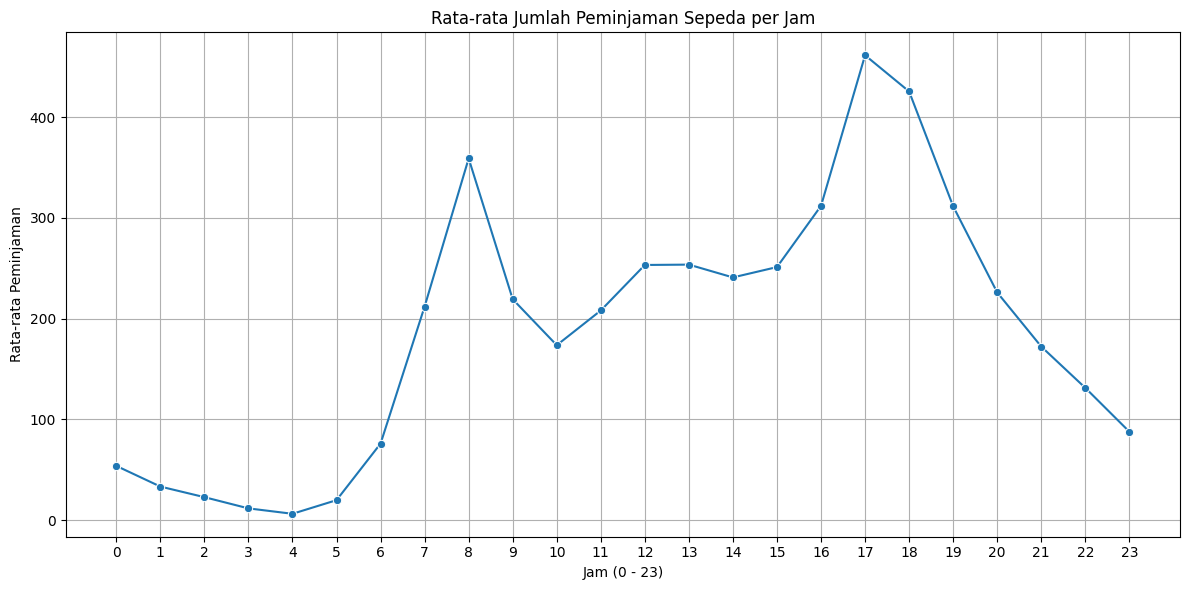

In [30]:
# Hitung rata-rata jumlah penyewaan per jam
hourly_avg = bike_hour_df.groupby('hr')['cnt'].mean()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Jam')
plt.xlabel('Jam (0 - 23)')
plt.ylabel('Rata-rata Peminjaman')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

### 5.2 Siapa yang lebih aktif: pengguna kasual atau pengguna terdaftar?

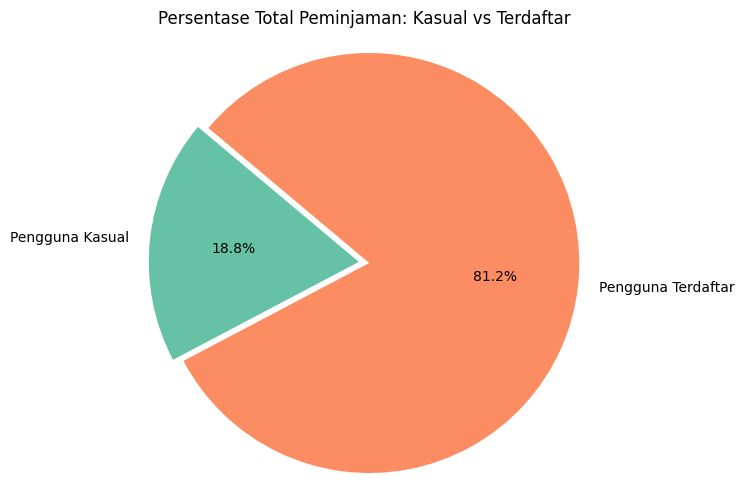

In [31]:
# Hitung total peminjaman berdasarkan tipe pengguna
total_casual = bike_day_df['casual'].sum()
total_registered = bike_day_df['registered'].sum()

# Data dan label
labels = ['Pengguna Kasual', 'Pengguna Terdaftar']
sizes = [total_casual, total_registered]
colors = ['#66c2a5', '#fc8d62']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05, 0))
plt.title('Persentase Total Peminjaman: Kasual vs Terdaftar')
plt.axis('equal')
plt.show()

### 5.3 Bagaimana perbedaan rata-rata jumlah peminjaman sepeda antara hari kerja, akhir pekan, dan hari libur? Kategori hari mana yang memiliki rata-rata peminjaman tertinggi dan terendah?


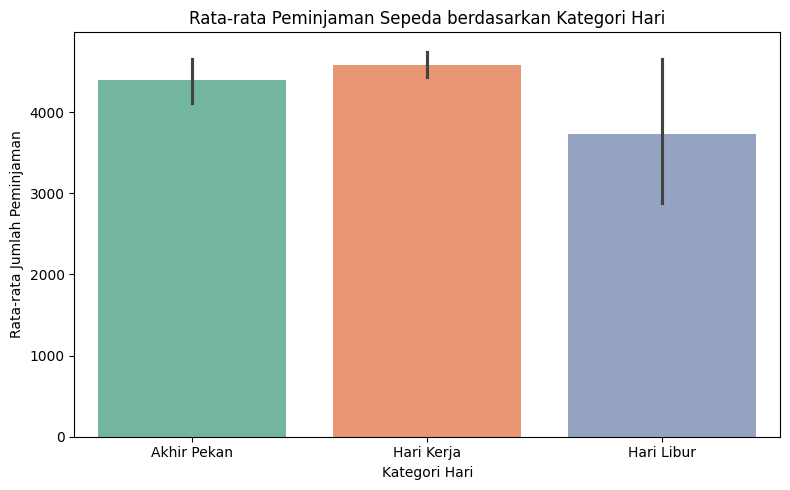

In [32]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=bike_day_df,
    x='day_category',
    y='cnt',
    estimator='mean',
    hue='day_category',
    palette='Set2',
    legend=False
)
plt.title('Rata-rata Peminjaman Sepeda berdasarkan Kategori Hari')
plt.xlabel('Kategori Hari')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.tight_layout()
plt.show()


### 5.4 Seberapa banyak hujan ringan benar-benar menurunkan jumlah peminjam sepeda pada jam sibuk?

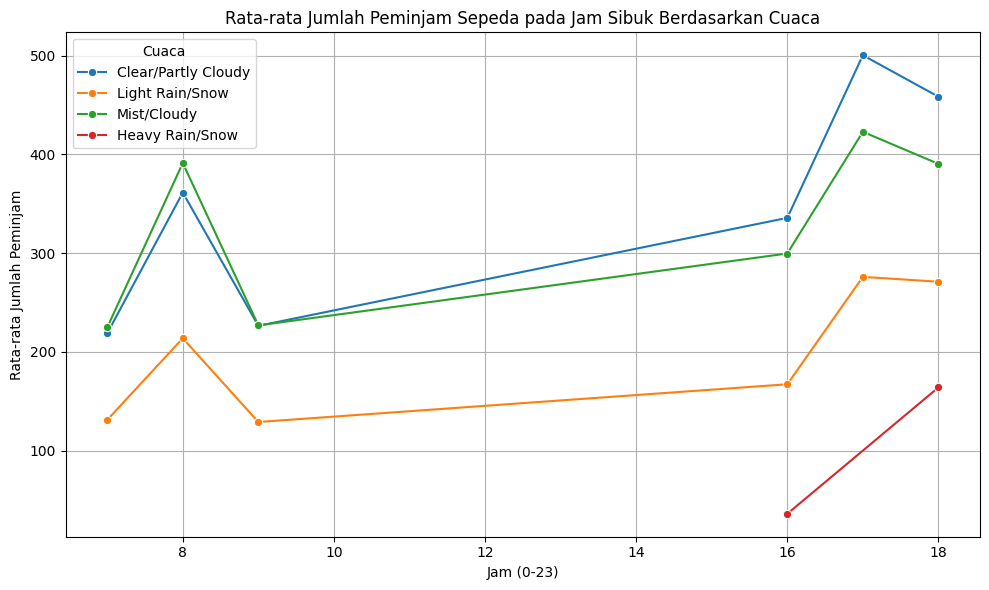

In [33]:
# Map cuaca
weather_map = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}
bike_hour_df['weather_label'] = bike_hour_df['weathersit'].map(weather_map)

# Filter jam sibuk saja
rush_hours = [7, 8, 9, 16, 17, 18]
rush_df = bike_hour_df[bike_hour_df['hr'].isin(rush_hours)]

# Hitung rata-rata cnt per jam dan cuaca
grouped = rush_df.groupby(['hr', 'weather_label'])['cnt'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='hr', y='cnt', hue='weather_label', marker='o')
plt.title('Rata-rata Jumlah Peminjam Sepeda pada Jam Sibuk Berdasarkan Cuaca')
plt.xlabel('Jam (0-23)')
plt.ylabel('Rata-rata Jumlah Peminjam')
plt.legend(title='Cuaca')
plt.grid(True)
plt.tight_layout()
plt.show()

### 5.5 Musim apa yang paling tinggi penyewaan sepedanya?

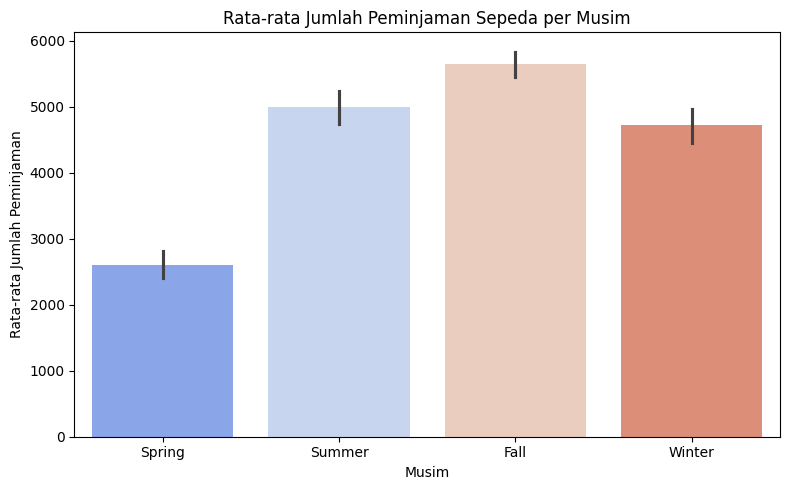

In [34]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=bike_day_df,
    x='season_label',
    y='cnt',
    hue='season_label',      # tambahkan hue
    estimator='mean',
    palette='coolwarm',
    legend=False             # matikan legend karena sudah di x-axis
)
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.tight_layout()
plt.show()


### 5.6 Apakah musim panas selalu punya peminjaman tertinggi tiap tahun?

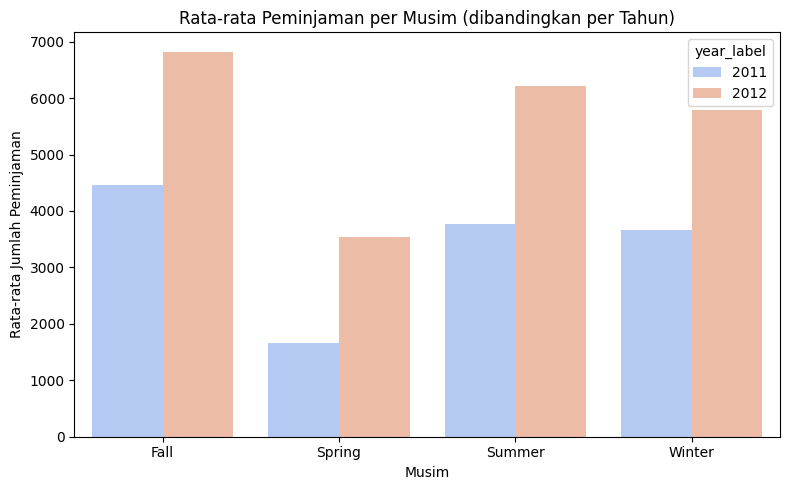

In [35]:
season_year_df = bike_day_df.groupby(['year_label', 'season_label'])['cnt'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=season_year_df, x='season_label', y='cnt', hue='year_label', palette='coolwarm')
plt.title('Rata-rata Peminjaman per Musim (dibandingkan per Tahun)')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.tight_layout()
plt.show()

# **6. Analisis Lanjutan (Opsional)**

### 6.1 Clustering dengan Binning (Kategori Peminjaman)
Tujuan: Mengelompokkan hari-hari berdasarkan jumlah peminjaman sepeda menjadi kategori rendah, sedang, dan tinggi.

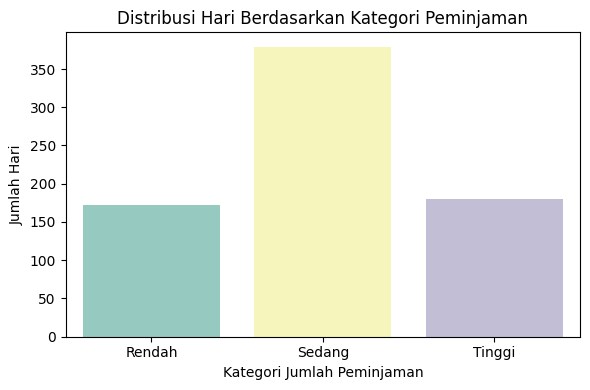

In [36]:
# Clustering berdasarkan jumlah peminjaman sepeda (cnt)
bins = [0, 3000, 6000, bike_day_df['cnt'].max()]
labels = ['Rendah', 'Sedang', 'Tinggi']
bike_day_df['cnt_group'] = pd.cut(bike_day_df['cnt'], bins=bins, labels=labels)

# Visualisasi
plt.figure(figsize=(6,4))
sns.countplot(data=bike_day_df, x='cnt_group', hue='cnt_group', palette='Set3', legend=False)
plt.title("Distribusi Hari Berdasarkan Kategori Peminjaman")
plt.xlabel("Kategori Jumlah Peminjaman")
plt.ylabel("Jumlah Hari")
plt.tight_layout()
plt.show()

Teknik ini menggunakan pendekatan binning (pengelompokan berdasarkan rentang nilai) untuk membuat manual cluster. Setiap hari dikelompokkan ke dalam kategori berdasarkan total peminjaman sepeda (cnt) hari tersebut.

**Rendah: < 3.000**

**Sedang: 3.000 – 6.000**

**Tinggi: > 6.000**

**Insight :** Dari hasil visualisasi, terlihat bahwa kategori Sedang mendominasi jumlah hari peminjaman, diikuti oleh Rendah, dan yang paling sedikit adalah kategori Tinggi. Ini mengindikasikan bahwa hari-hari dengan lonjakan besar adalah kejadian yang relatif jarang.

### 6.2 RFM Analysis (Modifikasi untuk Data Harian)

Tujuan: Mengadopsi prinsip RFM untuk mengelompokkan hari-hari berdasarkan:

In [40]:
# Pastikan kolom tanggal dalam format datetime
bike_day_df['date'] = pd.to_datetime(bike_day_df['dteday'])

# Hitung Recency (jumlah hari sejak tanggal terakhir dalam data)
latest_date = bike_day_df['date'].max()
bike_day_df['recency'] = (latest_date - bike_day_df['date']).dt.days

# Karena tidak ada user_id, kita pakai tanggal sebagai "proxy user"
rfm_df = bike_day_df.groupby('date').agg(
    recency=('recency', 'min'),         # hari sejak tanggal terakhir
    frequency=('registered', 'sum'),    # jumlah baris pada tanggal tsb
    monetary=('cnt', 'sum')             # total peminjaman sepeda per hari
).reset_index()

### 6.3 Visualisasi RFM

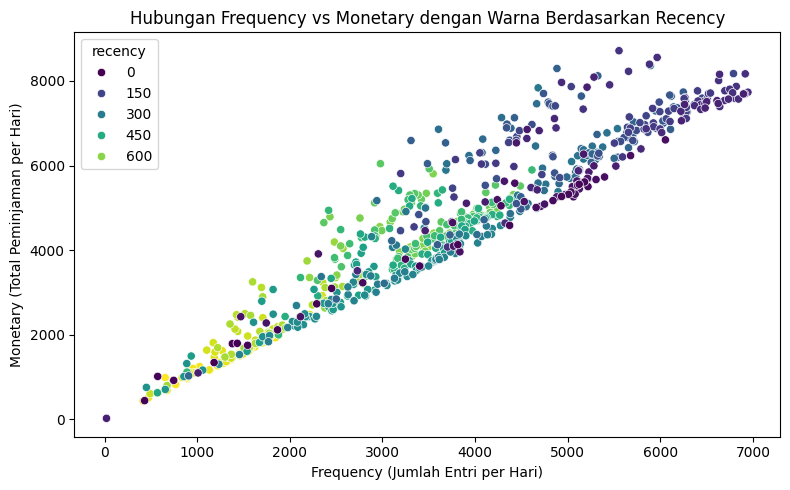

In [41]:
# Visualisasi hubungan F vs M, diwarnai berdasarkan Recency
plt.figure(figsize=(8,5))
sns.scatterplot(data=rfm_df, x='frequency', y='monetary', hue='recency', palette='viridis')
plt.title("Hubungan Frequency vs Monetary dengan Warna Berdasarkan Recency")
plt.xlabel("Frequency (Jumlah Entri per Hari)")
plt.ylabel("Monetary (Total Peminjaman per Hari)")
plt.tight_layout()
plt.show()

**Insight:** Terdapat korelasi positif antara frequency dan monetary, artinya semakin sering sepeda digunakan, semakin besar total peminjamannya per hari. Titik-titik dengan recency rendah (warna gelap) mendominasi nilai frequency dan monetary tinggi, menunjukkan bahwa hari-hari terbaru memiliki aktivitas peminjaman yang lebih tinggi, sedangkan hari-hari lama (warna terang) cenderung memiliki penggunaan lebih rendah.

### 6.4 Tambahan Opsional – Visualisasi Distribusi RFM

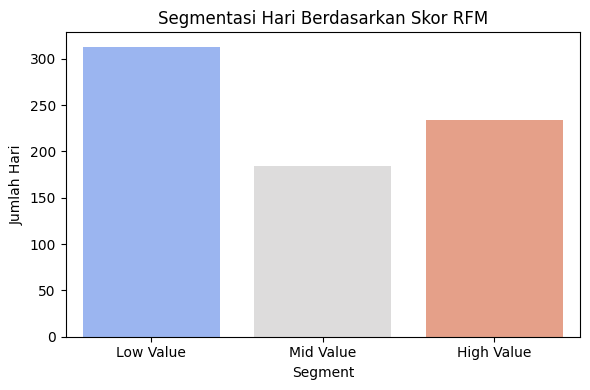

In [42]:
# Skoring manual dengan quantile (kuartil)
rfm_df['R_quartile'] = pd.qcut(rfm_df['recency'], 4, labels=[4,3,2,1])  # lebih rendah = lebih baik
rfm_df['F_quartile'] = pd.qcut(rfm_df['frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm_df['M_quartile'] = pd.qcut(rfm_df['monetary'], 4, labels=[1,2,3,4])

# Skor total untuk segmentasi
rfm_df['RFM_Score'] = rfm_df['R_quartile'].astype(int) + rfm_df['F_quartile'].astype(int) + rfm_df['M_quartile'].astype(int)

# Segment sederhana
rfm_df['Segment'] = pd.cut(rfm_df['RFM_Score'], bins=[2, 6, 9, 12], labels=['Low Value', 'Mid Value', 'High Value'])

# Visualisasi segmentasi
plt.figure(figsize=(6,4))
sns.countplot(data=rfm_df, x='Segment', hue='Segment', palette='coolwarm', legend=False)
plt.title("Segmentasi Hari Berdasarkan Skor RFM")
plt.xlabel("Segment")
plt.ylabel("Jumlah Hari")
plt.tight_layout()
plt.show()

**Insight** = Analisis RFM menunjukkan sebagian besar hari masuk segmen Low Value, dengan peminjaman rendah dan jarang terjadi. Sebaliknya, hari-hari High Value memiliki peminjaman tinggi dan terjadi baru-baru ini, kemungkinan saat musim gugur atau hari kerja. Fokus promosi sebaiknya diarahkan ke periode High Value, sementara Low Value bisa ditingkatkan lewat promo atau event khusus.

✅ **Rekomendasi Bisnis berdasarkan RFM Hari:**
Fokus promosi dan peningkatan layanan pada hari-hari High Value (misalnya weekday atau musim tertentu) untuk maksimalkan potensi retensi pengguna.

Untuk hari-hari Low Value, cobalah strategi peningkatan engagement seperti:

a. Promo musiman (diskon Spring)

b. Event komunitas saat weekend/low season

c. Notifikasi “ajak teman” atau gamifikasi aplikasi

# **7. Conclusion**

**1. Jam berapa terjadi lonjakan penyewaan sepeda per hari?**

**Kesimpulan:** Terdapat dua puncak lonjakan peminjaman sepeda, yaitu pukul 08.00 pagi dan 17.00 sore. Ini mencerminkan pola komuter—sepeda digunakan untuk pergi dan pulang kerja/sekolah.

**Saran/Rekomendasi:**

a. Menyediakan lebih banyak unit sepeda di jam-jam tersebut.

b. Menambah stasiun sepeda di sekitar area perkantoran dan sekolah.

c. Menawarkan promo “rush hour” untuk meningkatkan retensi pengguna aktif.


**2. Siapa yang lebih aktif: pengguna kasual atau pengguna terdaftar?**

**Kesimpulan:** Pengguna terdaftar menyumbang 81,2% peminjaman, jauh lebih tinggi dibanding pengguna kasual (18,8%).

**Saran/Rekomendasi:**

a. Tingkatkan fitur dan benefit untuk pengguna terdaftar (contoh: point reward, layanan prioritas).

b. Buat strategi onboarding atau diskon awal untuk menarik pengguna kasual agar mendaftar.

**3. Bagaimana perbedaan rata-rata jumlah peminjaman sepeda antara hari kerja, akhir pekan, dan hari libur?**

**Kesimpulan:**

Hari kerja: rata-rata tertinggi

Akhir pekan: sedang

Hari libur: terendah dengan variasi tinggi

**Saran/Rekomendasi:**

a. Optimalkan armada pada hari kerja untuk efisiensi.

b. Untuk akhir pekan/hari libur, buat event komunitas atau promo keluarga agar mendorong pemakaian.

c. Pasang signage atau notifikasi aplikasi untuk mendorong orang tetap bersepeda saat libur.

**4. Seberapa banyak hujan ringan benar-benar menurunkan jumlah peminjam sepeda pada jam sibuk?**

**Kesimpulan:** Peminjaman turun drastis saat hujan ringan/deras, terutama di jam sibuk. Cuaca cerah dan berawan mendukung peminjaman tertinggi.

**Saran/Rekomendasi:**

a. Tambahkan fitur notifikasi cuaca pada aplikasi dan sediakan tips bersepeda aman saat hujan.

b. Sediakan pelindung hujan (rain cover) atau diskon saat cuaca kurang baik untuk mendorong pemakaian.

**5. Musim apa yang paling tinggi penyewaan sepedanya?**

**Kesimpulan:** Musim gugur (Fall) adalah yang tertinggi (> 5500), diikuti Summer & Winter, dengan Spring sebagai musim terendah (~2500).

**Saran/Rekomendasi:**

a. Fokuskan promosi besar-besaran di awal Fall untuk memaksimalkan tren.

b. Lakukan survey untuk tahu penyebab rendahnya penggunaan di Spring (cuaca buruk, libur panjang, dsb).

**6. Apakah musim panas selalu punya peminjaman tertinggi tiap tahun?**

**Kesimpulan:** Tidak. Musim gugur tetap dominan di 2011 dan 2012, sementara peminjaman meningkat di semua musim dari 2011 ke 2012.

**Saran/Rekomendasi:**

a. Jangan hanya fokus pada Summer, Fall justru peluang utama.

b. Evaluasi campaign tahunan dan sesuaikan strategi marketing setiap musim.